In [1]:
from collections import Counter
from matplotlib import pyplot as plt
import math
import random

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

In [2]:
def majority_vote(labels):
    """assumes that labels are ordered from neaarest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest
    

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda (point, _): distance(point, new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

In [3]:
majority_vote(['a', 'a', 'b'])

'a'

In [4]:
Counter(['a', 'a', 'b']).values()

[2, 1]

In [5]:
Counter(['a', 'a', 'b']).most_common(1)

[('a', 2)]

In [6]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]

In [7]:
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [8]:
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)


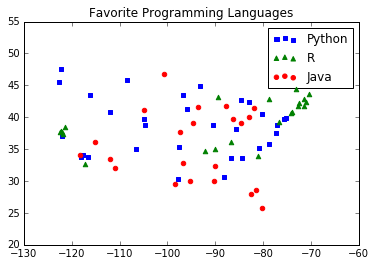

In [9]:
# create a scatter series for each language
for language, (x, y) in plots.iteritems():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plt.legend(loc=0)            # let matplotlib choose the location
plt.axis([-130,-60,20,55])   # set the axes

plt.title("Favorite Programming Languages")
plt.show()

In [10]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0

    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                        for other_city in cities
                        if other_city != city]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print k, "neighbor[s]:", num_correct, "correct out of", len(cities)

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


In [11]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 1 # or 3, or 5, or ...

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

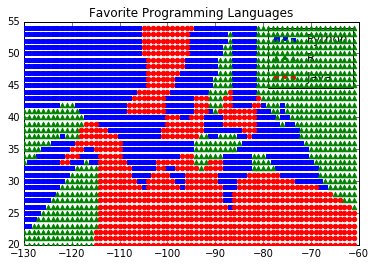

In [12]:
# create a scatter series for each language
for language, (x, y) in plots.iteritems():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plt.legend(loc=0)            # let matplotlib choose the location
plt.axis([-130,-60,20,55])   # set the axes

plt.title("Favorite Programming Languages")
plt.show()

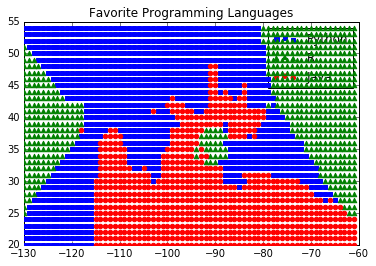

In [13]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 5 # or 3, or 5, or ...

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.iteritems():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plt.legend(loc=0)            # let matplotlib choose the location
plt.axis([-130,-60,20,55])   # set the axes

plt.title("Favorite Programming Languages")
plt.show()

In [14]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

In [15]:
random_distances(100,10)

[3.840428324620833,
 4.032287731329247,
 4.631360202387288,
 4.015869266154506,
 4.193327942335083,
 3.957258208964719,
 4.183688693487725,
 3.997241659103902,
 3.9137707834735824,
 4.121590464817564]

In [28]:
def mean(x):
    return sum(x) / len(x)

dimensions = range(1, 201)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
  distances = random_distances(dim, 3000)  # 10,000 random pairs
  avg_distances.append(mean(distances))     # track the average
  min_distances.append(min(distances))      # track the minimum

min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

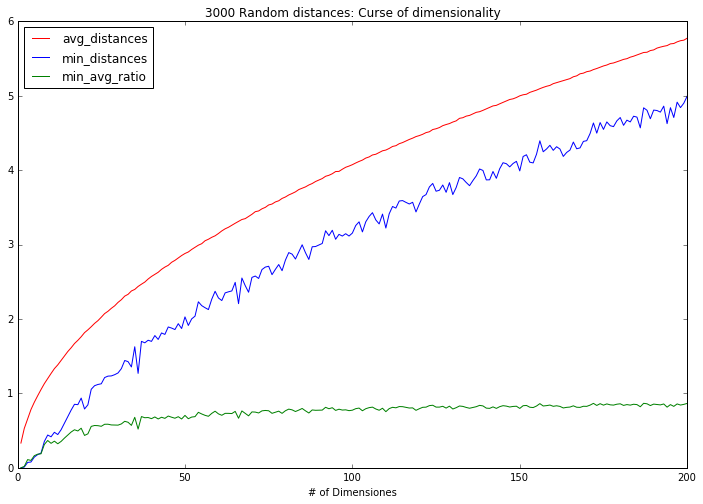

In [29]:

plt.figure(figsize=(12,8))
plt.plot(dimensions, avg_distances, color='r', label='avg_distances')
plt.plot(dimensions, min_distances, color='b', label='min_distances')
plt.legend(loc=0)            # let matplotlib choose the location
plt.title("3000 Random distances: Curse of dimensionality")
plt.xlabel('# of Dimensiones')
plt.show()

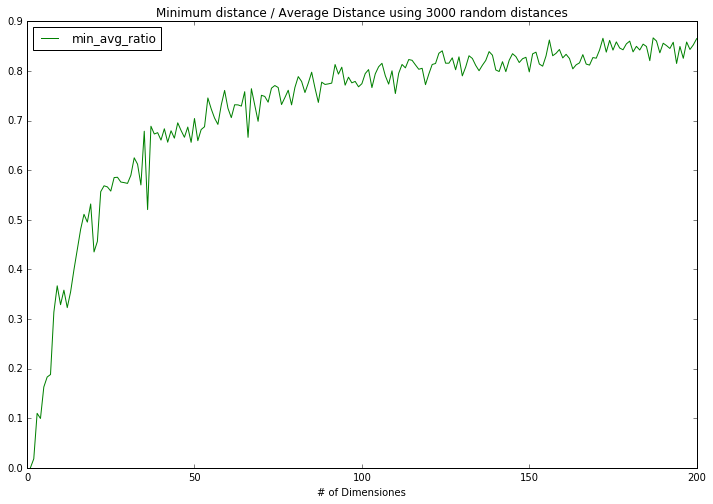

In [35]:
plt.figure(figsize=(12,8))
plt.plot(dimensions, min_avg_ratio, color='g', label='min_avg_ratio')
plt.title("Minimum distance / Average Distance using 3000 random distances")
plt.xlabel('# of Dimensiones')
plt.legend(loc=0)            # let matplotlib choose the location
plt.show()